## **Earth Sciences: 2nd Year Climate Change Course**
### **Practical:** Modelling global mean surface temperature

### **Overview**

In this practical session we will use a simple, global-mean climate model to explore the sensitivity of Earth's climate to variations in greenhouse gases, aerosols and natural forcing (volcanic eruptions). 

The simple globally-averged climate model is called the `Finite-amplitude Impulse Response` model, or `FaIR` for short. It allows the user to input emissions of greenhouse gases and short lived climate forcers in order to estimate global mean **atmospheric greenhouse gas (GHG) concentrations**, **radiative forcing** and **temperature anomalies**.

For more information on FaIR, see the [documentation](https://docs.fairmodel.net/en/latest/).

The objective of these exercises is to consolidate your understanding of basic climate change concepts, rather than to learn Python!  Therefore, this notebook contains all the code you will need, and only minor changes to the model inputs will be required to answer the questions below. Note that changes will not be saved in these notebooks, so you will need to keep a separate record of your responses to the questions below (which appear in <span style="color:blue">blue</span>) and of any input parameters you want to remember.

<br>

***Acknowledgements:** Thanks to Peter Watson and Myles Allen for creating the first iteration of these notebooks, and to the `FaIR` development team for making the model available.*


</br>
</br>

# 1. Climate and CO2 concentrations

In this section we start by driving the model with CO2 concentrations (not thinking about emissions yet!), to understand how global-mean temperature responds to idealized changes in the level of CO2 in the atmosphere. First, we examine the response to an instantaneous step-change in CO2 concentrations, and investigate the concept of the *Equilibrium Climate Sensitivity* (ECS). Then we examine the response of global-mean temperature to a "ramp-up" scenario, where we slowly increase the concentration of atmospheric CO2 over time. This motivates the need to consider the *Transient Climate Response* (or TCR).



### **Basic Imports**

- **Numpy** is a library built on top of C which allows you to perform rapid numerical calculations in Python and generate/manipulate arrays and matrices in a similar way to in MATLAB. <br>


- **Matplotlib** is the canonical plotting package in Python; as you might have guessed by the name, it's basically an open-source version of MATLAB's plotting functions. <br>
    - The '%matplotlib inline' comment just allows normal plotting within the Jupyter notebooks

In [1]:
%matplotlib inline

In [2]:
# Basic imports
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import fair

# Check we're using v1.6.1 
print(f"We're using FaIR version {fair.__version__}") 

# The "engine" of fair is fair_scm, stored in the fair.forward class
from fair.forward import fair_scm

We're using FaIR version 1.6.1


### **Model Set Up**

##### A. Defining key model parameters:

In [3]:
# Default model parameters:
ECS_def = 2.7     # equilibrium climate sensitivity (K), default = 2.7K
TCR_def = 1.6     # transient climate response (K), default = 1.6K
tau_s_def = 4.1   # ocean mixed layer response time scale (years), default = 4.1yrs
tau_d_def = 239.0 # deep ocean response time scale (years), default = 239.0yrs

# Alterable parameters:
ECS = 3.5         # equilibrium climate sensitivity (K), default = 2.7K
TCR = 1.6         # transient climate response (K), default = 1.6K
tau_s = 4.1       # ocean mixed layer response time scale (years), default = 4.1yrs
tau_d = 239.0     # deep ocean response time scale (years), default = 239.0yrs

##### B. Defining maximum CO2 concentration in ppm and model run time:

In [4]:
# Define initial and max CO2:
CO2_init = 275
CO2_max  = 2*275

# Define model run length:
nyears = 500
# Define time axis:
years=np.arange(nyears)

##### C. Defining example CO2 concentration scenarios:

In [5]:
""" Define step-change scenario """
# Define timeseries of CO2 concentrations:
concentrations_step = np.ones(nyears)*CO2_init 

# After year 50, set CO2 to 'CO2_max':
concentrations_step[years>50] = CO2_max 


""" Define ramp-up scenario """
# Define timeseries of CO2 concentrations:
concentrations_ramp = CO2_init*np.power(1.01, years)

# After year 70, set CO2 to 'CO2_max':
concentrations_ramp[years>70] = CO2_max

""" SWITCH: Do you want to plot the step-change scenario (concentrations_step) or the ramp-up scenario (concentrations_ramp)? """
concentrations = concentrations_step

### **Running Our Model**

In [6]:
""" Run the simple climate model """
# Outputs are concentrations (C), forcing (F) and global-mean surface temperature change (T).

# Run with default parameters
C_def, F_def, T_def = fair_scm(
    emissions_driven=False, # Tells the model we're using concentrations rather than emissions
    C=concentrations,       # Input concentrations
    useMultigas=False,      # Only consider CO2
    tcrecs=np.array([TCR_def, ECS_def]),
    d=np.array([tau_d_def, tau_s_def]))

# Run again with altered parameters 
C,F,T = fair_scm(
    emissions_driven=False, # Tells the model we're using concentrations rather than emissions
    C=concentrations,       # Input concentrations
    useMultigas=False,      # Only consider CO2
    tcrecs=np.array([TCR, ECS]),
    d=np.array([tau_d, tau_s]))


### **Exploring Model Outputs**

In [7]:
# Key model output statistics:
print('T at year 70  = {:.2f}'.format(T[70]))
print('Final T       = {:.2f}'.format(T[-1]))
print('Forcing       = {:.2f} (W/m2)'.format(F[-1]))

T at year 70  = 1.53
Final T       = 3.13
Forcing       = 3.65 (W/m2)


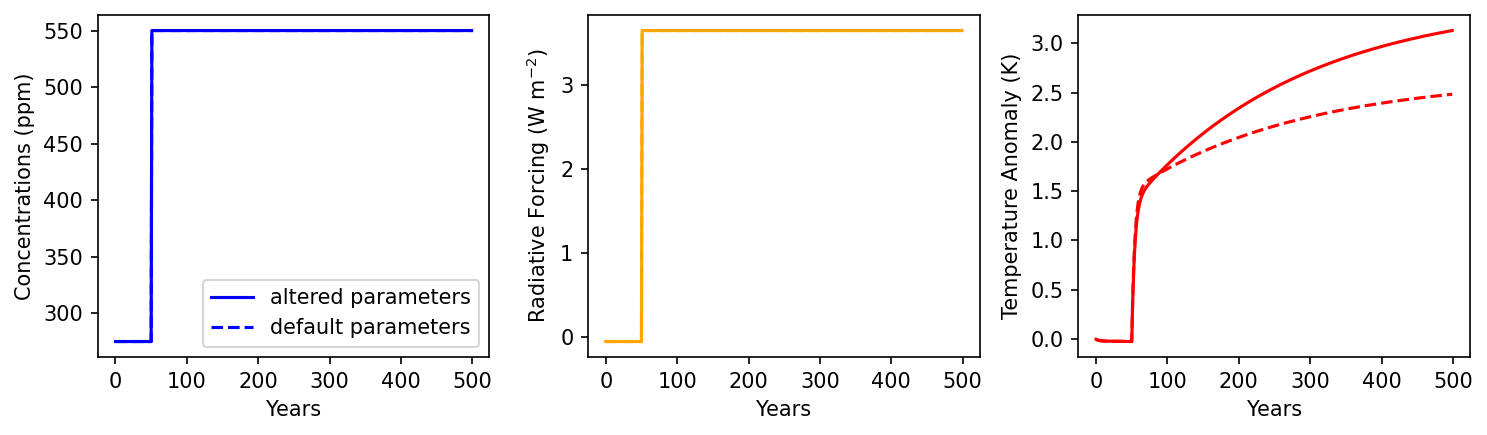

In [8]:
# -- Figure --
# Define figure with 3 subplots side-by-side (in 3 columns).
fig,axs = plt.subplots(ncols=3, dpi=150, figsize=(10,3))

# Plot the CO2 concentration timeseries for example step-change scenario + default parameters:
axs[0].plot(years, C, color='blue', label='altered parameters')
axs[0].plot(years, C_def, color='blue', linestyle='--', label='default parameters')
axs[0].set_ylabel("Concentrations (ppm)")
axs[0].set_xlabel("Years")

# Plot the radiative forcing timeseries for example step-change scenario + default parameters:
axs[1].plot(years, F, color='orange', label='altered parameters')
axs[1].plot(years, F_def, color='orange', linestyle='--', label='default parameters')
axs[1].set_ylabel("Radiative Forcing (W m$^{-2}$)")
axs[1].set_xlabel("Years")

# Plot the global-mean temperature anomaly timeseries for example step-change scenario + default parameters:
axs[2].plot(years, T, color='red', label='altered parameters')
axs[2].plot(years, T_def, color='red', linestyle='--', label='default parameters')
axs[2].set_ylabel("Temperature Anomaly (K)")
axs[2].set_xlabel("Years")

# Add a legend to the first subplot:
axs[0].legend()

fig.tight_layout() # Cleans up the labels so they don't overlap

### **Scenario 1:** Response of global-mean temperature to a step-change in CO2 concentrations.

Make sure the model is set to simulate the step-up scenario (with `concentrations = concentrations_step` at the bottom of block C above). 

 -  <span style="color:blue">Find what warming occurs under different levels of peak CO2 concentration values (CO2_max in block B). </span>
    
For guidance on a sensible range to explore, note that current levels are approximately 420ppm, and concentrations reach about 1200ppm at the end of the 21st century under "business as usual" emissions scenarios.

- <span style="color:blue"> What is the relationship between CO2 concentrations and long-term warming?</span>

Extra brownie points if you can plot this! The following code snippet might be helpful...

```python
fig,ax = plt.subplots() # Sets up a figure and axis for plotting

# Plot a line graph of peak warming vs CO2 concentrations
ax.plot(concentrations, peak_warming) 
```

You will have to generate these input arrays yourself by running the model a few times and then putting the outputs into a numpy array.

For example:
```python
concentrations = np.array([300, 400, 500, 600, 700, 1000, 1500, 2000, 4000, ...])

# Run the model for each of these, then make an array of peak_warming values
peak_warming = np.array([temp1, temp2, temp3, ... etc])
```

- <span style="color:blue">How does the temperature response change when you vary the free parameters in the model?  Try changing the equilibrium climate sensitivity (ECS), transient climate response (TCR), surface ocean response time scale (tau_s) and deep ocean response time scale (tau_d) in block A above? Can you explain the impact these have? What physical phenomena affect these parameters for the real Earth? </span>

### **Scenario 2:** Response of global-mean temperature to a ramp-up in CO2 concentrations

Now make sure the model is set to simulate the ramp-up scenario (with `concentrations = concentrations_ramp` at the bottom of block C). 

 - <span style="color:blue">Again, what is the effect on the temperature response of varying the equilibrium climate sensitivity (ECS), transient climate response (TCR), ocean mixed layer response time scale and deep ocean response time scale? </span>
 
 - <span style="color:blue">Which parameters have the greatest effect on the long term and short term climate response?</span>

</br>
</br>

# 2: Impact of aerosols and volcanic eruptions on climate

So, now we've got a sense of how the climate system responds to a step-change of CO2 and a steady "ramp-up" scenario (not unlike what we are experiencing now!), but in reality there is more to the atmosphere than just CO2 concentrations...

Both **human activity and volcanic eruptions** can have a marked **cooling effect** on the climate, by releasing **aerosols** into the atmosphere. Aerosols are tiny particles of dust and pollution that scatter incoming solar radiation, causing a global *dimming effect* which can cool the planet. This constitutes a short-lived, *negative* radiative forcing.

In this section we will use the `FaIR` model to investigate how the climate responds to these negative radiative forcing changes, and understand how they counteract some of the short-term impacts of CO2.


### **Model Set Up**

##### A. Defining key model parameters:

In [9]:
# Default model parameters, allowing curves corresponding to this model to be plotted for comparison - there's 
# no need to change these unless you want to compare the results using the parameters you set above to a 
# different model:
ECS_def = 2.7     # equilibrium climate sensitivity (K), default=2.7K
TCR_def = 1.6     # transient climate response (K), default=1.6K
tau_s_def = 4.1   # ocean mixed layer response time scale (years), default=4.1yrs
tau_d_def = 239.0 # deep ocean response time scale (years), default=239.0yrs

# Alterable parameters:
ECS = 3.5         # equilibrium climate sensitivity (K), default=2.7K
TCR = 1.6         # transient climate response (K), default=1.6K
tau_s = 4.1       # ocean mixed layer response time scale (years), default=4.1yrs
tau_d = 239.0     # deep ocean response time scale (years), default=239.0yrs


# Define run length:
nyears = 300

# Define time axis:
years=np.arange(nyears)

##### B. Defining forcing time-series

In [10]:
# Defining negative forcing time-series:
forcing = np.zeros(nyears)

# From year 5, define forcing equal to a constant (fval), negative value for 10 years (duration):)
fval = -1
duration = 10
forcing[np.where(np.logical_and(years > 5, years < 5 + duration + 1))] = fval

### **Run Our Model**

In [11]:
# Outputs are concentrations (C), forcing (F) and temperature change (T)

# Run with default parameters
_,F_def,T_def = fair_scm(
    emissions=False,                     # Just drive the model using radiative forcing
    other_rf = forcing,                  # Input time-series of radiative forcing
    useMultigas=False,                   
    tcrecs=np.array([TCR_def, ECS_def]),
    d=np.array([tau_d_def, tau_s_def]))

# Run again with altered parameters 
_,F,T = fair_scm(
    emissions=False,                      # Just drive the model using radiative forcing
    other_rf = forcing,                   # Input time-series of radiative forcing
    useMultigas=False,                   
    tcrecs=np.array([TCR, ECS]),
    d=np.array([tau_d, tau_s]))

### **Explore Model Outputs**

In [12]:
# Key model output statistics:
print('Lowest T = {:.2f} (K)'.format(np.min(T)))
print(r'Ratio of T to forcing = {:.2f}'.format(np.min(T)/fval))


Lowest T = -0.37 (K)
Ratio of T to forcing = 0.37


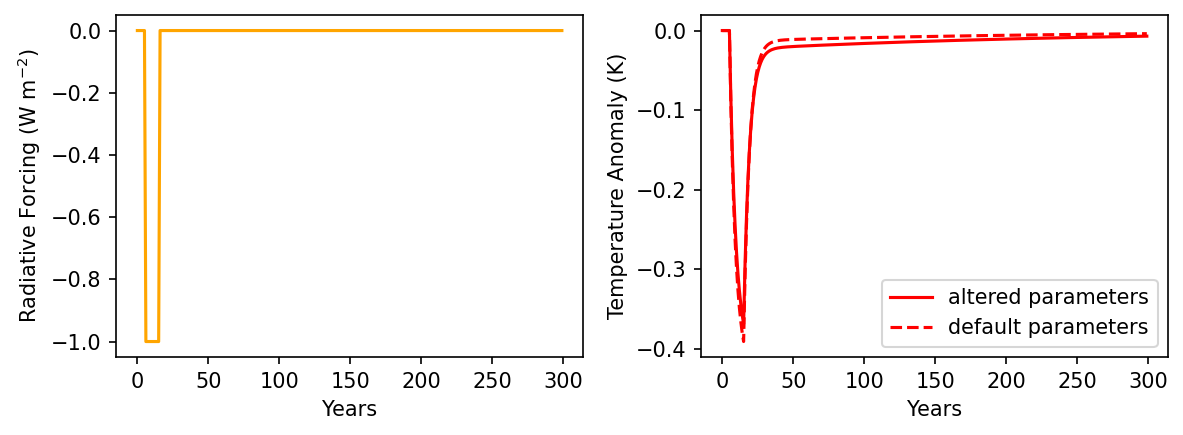

In [13]:
# -- Figure --
fig,axs = plt.subplots(ncols=2, dpi=150, figsize=(8,3))

# Plot radiative forcing timeseries:
axs[0].plot(years, F, color='orange')
axs[0].set_ylabel("Radiative Forcing (W m$^{-2}$)")
axs[0].set_xlabel("Years")

# Plot temperature anomaly timeseries with default & altered parameters:
axs[1].plot(years, T, color='red', label='altered parameters')
axs[1].plot(years, T_def, color='red', linestyle='--', label='default parameters')
axs[1].set_ylabel("Temperature Anomaly (K)")
axs[1].set_xlabel("Years")

axs[1].legend()

fig.tight_layout() # Cleans up the labels so they don't overlap

### A few things to try...

 - <span style="color:blue">Vary the strength (`fval`) and `duration` of the radiative forcing perturbation in block B above: what do you notice about the response of the radiative forcing and temperature? How is this different from the response to greenhouse gases?</span>

- <span style="color:blue">What happens to the temperature response if you change the equilibrium climate sensitivity (ECS), transient climate response (TCR), the ocean mixed layer response time scale and the deep ocean response time scale? </span>
 
Change these in block A under Section 2 this time.
  
 - <span style="color:blue">In the GHG-dominated case, all of these parameters mattered, what about now?</span>


</br>
</br>

# 3: Simulating historical 20th century temperatures


We have now investigated the response of global-mean climate change to a step-change in CO$_{2}$ concentrations, a steady "ramp-up" in CO$_{2}$ concentrations, and a short-lived negative pulse of radiative forcing. Together these make up the ingredients we need to begin to understand the evolution of global mean surface temperature over the 20th century!

In this section we will see that our simple climate model can do a good job at simulating change over the 20th century, and use the model to decompose the temperature changes into contributions from:

- Greenhouse gases </br>

- Aerosols </br>

- Natural variability (Solar cycle, volcanoes etc) </br>

### **Installation Notes**

**If you are running this notebook on your laptop**, make sure you have the following files in the same directory as this notebook or somewhere in your Python path:

 - `fair_main_demo.py` - Python code for running the FAIR model.
 - `RCP85_MIDYEAR_RADFORCING.csv` - Comma-separated-values file giving radiative forcing for the RCP8.5 scenario.
 - `HadCRUT.4.5.0.0.annual_ns_avg.txt` - Text file giving observed global mean surface temperatures.
 
 This will be taken care of automatically if you are running the notebook on the virtual server.

In [14]:
# Basic imports
from utils import *

</br>

### **Observations** - What did the 20th century look like?

We have a good handle on how global mean surface temperature has changed during the historical period (20$^{\mathrm{th}}$ century). You can see a plot of the global-mean, annual-mean temperature anomaly below (relative to the 1861-1880 climatology). The warming is clear to see.

In [15]:
# Read HadCRUT 4.5.0.0 data:
Y_obs, T_obs = np.genfromtxt("../data/HadCRUT.4.5.0.0.annual_ns_avg.txt")[:,0], np.genfromtxt("../data/HadCRUT.4.5.0.0.annual_ns_avg.txt")[:,1]
# Determine indices of observations between 1861 and 1880:
i_obs_clm=(1861<=Y_obs) & (Y_obs<=1880)
# Subtract mean of observations between 1861 and 1880 from observations:
T_obs= T_obs - np.mean(T_obs[i_obs_clm])

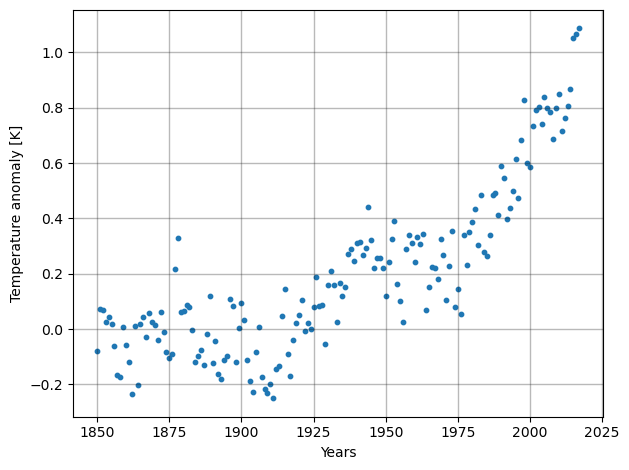

In [16]:
# -- Figure --
fig, ax = plt.subplots(dpi=100)
ax.grid(True, linewidth=1, color='0.1', alpha=0.3)
# Plot scatter of annual mean temperature anomaly observations:
ax.scatter(Y_obs, T_obs, s=10)
ax.set_ylabel("Temperature anomaly [K]")
ax.set_xlabel("Years")
fig.tight_layout() # Cleans up the labels so they don't overlap

### **Simulating the 20th century temperature record with `FaIR`**

##### A. Defining model parameters:

In [17]:
# Define key model parameters:
ECS_def = 2.7     # equilibrium climate sensitivity (K), default=2.7K   (uncertainty: 1.5-4.5°C)
TCR_def = 1.6     # transient climate response (K), default=1.6K        (uncertainty: 1.0–2.5°C)
tau_s_def = 4.1   # ocean mixed layer response time scale (years), default=4.1yrs
tau_d_def = 239.0 # deep ocean response time scale (years), default=239.0yrs

# Define scalings for the anthropogenic GHG and aerosol and natural forcings (defaults=1.0):
ghg_scale=1.0 # ±20% uncertainty, IPCC
aer_scale=1.0 # ±30% uncertainty, IPCC
nat_scale=1.0 # ±50% uncertainty, IPCC

##### B. Read historical radiative forcing to 2020:

In [18]:
# Import RCP8.5 forcing data from .csv:
years,F_tot,F_ant,F_ghg,F_co2=load_rcp_forcing('../data/RCP85_MIDYEAR_RADFORCING.csv',Y_max=2020)

# Define aerosol forcing as difference between total anthropogenic forcing and that due to greenhouse gases:
F_aer= F_ant - F_ghg
# Define natural forcing as difference between total forcing and total anthropogenic forcing:
F_nat= F_tot - F_ant

# Scale the forcings:
F_ghg = F_ghg*ghg_scale
F_co2 = F_co2*ghg_scale
F_aer = F_aer*aer_scale
F_nat = F_nat*nat_scale

# Determine new total and anthropogenic forcings
F_ant = F_ghg + F_aer
F_tot = F_ant + F_nat

### **Run Our Model**

In [19]:
# Outputs are concentrations (C), forcing (F) and temperature change (T).

# Run the model with total radiative forcing:
_,F_tot,T_tot = fair_scm(
    emissions=False,                     # Just drive the model using radiative forcing
    other_rf = F_tot,                    # Input time-series of radiative forcing
    useMultigas=False,                   
    tcrecs=np.array([TCR_def, ECS_def]),
    d=np.array([tau_d_def, tau_s_def]))

# Run the model with anthropogenic radiative forcing:
_,F_ant,T_ant = fair_scm(
    emissions=False,                     # Just drive the model using radiative forcing
    other_rf = F_ant,                    # Input time-series of radiative forcing
    useMultigas=False,                   
    tcrecs=np.array([TCR_def, ECS_def]),
    d=np.array([tau_d_def, tau_s_def]))

# Run the model with GHG radiative forcing:
_,F_ghg,T_ghg = fair_scm(
    emissions=False,                     # Just drive the model using radiative forcing
    other_rf = F_ghg,                    # Input time-series of radiative forcing
    useMultigas=False,                   
    tcrecs=np.array([TCR_def, ECS_def]),
    d=np.array([tau_d_def, tau_s_def]))

# Run the model with aerosol radiative forcing:
_,F_aer,T_aer = fair_scm(
    emissions=False,                     # Just drive the model using radiative forcing
    other_rf = F_aer,                    # Input time-series of radiative forcing
    useMultigas=False,                   
    tcrecs=np.array([TCR_def, ECS_def]),
    d=np.array([tau_d_def, tau_s_def]))

# Remove 1861-80 climatology from all temperature anomalies:
i_clm = (1861<=years) & (years<=1880)
T_tot = T_tot - np.mean(T_tot[i_clm])
T_ant = T_ant - np.mean(T_ant[i_clm])
T_ghg = T_ghg - np.mean(T_ghg[i_clm])
T_aer = T_aer - np.mean(T_aer[i_clm])

### **Explore Model Output**

In [20]:
# Statistics of model outputs:
print("Simulated anthropogenic warming in 2015:", round(T_ant[years==2015][0], 2))

# Compute standard deviation of differences of simulated temperature from observations (a measure of the 
# goodness of fit, with smaller values implying a better fit):
T_std = np.std(T_obs[(1861 <= Y_obs) & (Y_obs <= 2016)] - T_tot[(1861 <= years) & (years <= 2016)])
print("Standard deviation of error of total response (K)", round(T_std, 3))


Simulated anthropogenic warming in 2015: 0.93
Standard deviation of error of total response (K) 0.109


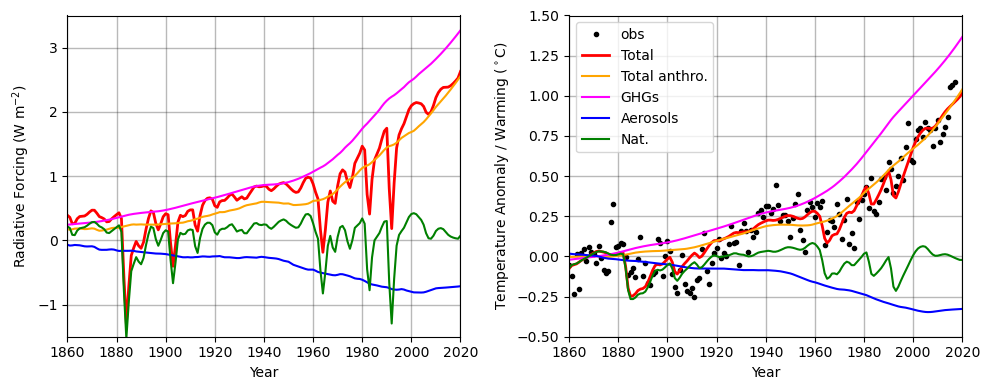

In [21]:
# -- Figure --
fig, axs = plt.subplots(ncols=2, dpi=100, figsize = (10,4))
[ax.grid(True, linewidth=1, color='0.1', alpha=0.3) for ax in axs]

# Plot components of radiative forcing:
axs[0].axis([1860., 2020., -1.5, 3.5])
axs[0].plot(years,F_tot,color='red',linewidth=2)
axs[0].plot(years,F_ant,color='orange')
axs[0].plot(years,F_ghg,color='magenta')
axs[0].plot(years,F_aer,color='blue')
axs[0].plot(years,F_nat,color='green')
axs[0].set_ylabel("Radiative Forcing (W m$^{-2}$)")
axs[0].set_xlabel("Year")

# Plot components of temperature change:
axs[1].axis([1860., 2020., -0.5, 1.5])
axs[1].plot(Y_obs,T_obs,color='black',marker='.',ls='None',label='obs')
axs[1].plot(years,T_tot,color='red',label='Total',linewidth=2)
axs[1].plot(years,T_ant,color='orange',label='Total anthro.')
axs[1].plot(years,T_ghg,color='magenta',label='GHGs')
axs[1].plot(years,T_aer,color='blue',label='Aerosols')
axs[1].plot(years,T_tot-T_ant,color='green',label='Nat.')
axs[1].set_ylabel("Temperature Anomaly / Warming ($^\circ$C)")
axs[1].set_xlabel("Year")
axs[1].legend(loc='upper left')

fig.tight_layout() # Cleans up the labels so they don't overlap

### So what happened over the historical period and why?

- <span style="color:blue">Explain the main features of the greenhouse gas, aerosol and natural radiative forcing curves.</span>

- <span style="color:blue">Vary the scalings of the greenhouse gas, aerosol and natural radiative forcings in block A under Section 3 above - how does each affect the simulated temperatures?</span>

- <span style="color:blue">Vary the ECS and TCR values within the given likely ranges according to the IPCC. How do the anthropogenic and total temperature anomalies vary?</span>

### How well do 20th century climate observations constrain our models?

 - <span style="color:blue">By varying ECS and TCR together, keeping them within the IPCC likely ranges, find the lowest and highest values of each that seem consistent with observed temperatures in this model, assuming that the specified forcings are correct (i.e. with all scalings equal to 1)? </span>
 
 - <span style="color:blue">Which of the TCR and ECS seems to be better constrained by the observations of the past?</span>
 
 - <span style="color:blue">What does this imply about the relative uncertainty in predictions of warming over the next century and in subsequent centuries, if CO2 concentrations were to rise and then stay constant?</span>
 
 - <span style="color:blue">Set ECS back to 2.7K. If aerosol forcing is scaled up or down by 30%, how much can the TCR be varied whilst keeping the simulated total warming realistic? How important do you think knowing the aerosol forcing is for constraining future climate change? </span>
 
You might also want to think about why the model simulation does not match the observations exactly for any values of the parameters...

</br>
</br>

# 4. From emissions to concentrations of carbon-dioxide and methane


Having so far forced the model with greenhouse gas concentrations in the atmosphere, we now move on to specify greenhouse gas *emissions*. This is clearly more relevant to understanding modern climate change, because we have control over our emissions!

In this section we will look at the response of the climate to **pulse injections** of CO2 and methane in our simple model. 

### **Model Set Up**

##### A. Defining model parameter and forcing in terms of emissions:

In [22]:
# Defining peak emissions rate of CO2 pulse, its duration and the year it starts:
# Note current emissions are ~37GtCO2/yr.
peak_emissions_C = 37 # units are GtCO2/yr
duration_C       = 1 # units are years
year_start_C     = 50

# Define the same parameters for the methane emissions pulse. 
# Note current emissions are ~500MtCH4/yr.
peak_emissions_M = 500 # units are MtCH4/yr, default 500
duration_M       = 1 # units are years, default 10
year_start_M     = 50
lifetime_M       = 9.3 # Lifetime of CH4, default 9.3 yrs

# Define the same parameters for an N2O emissions pulse:
# Note current emissions are ~9MtNO2/yr.
peak_emissions_N = 0. # units are MtN2O/yr (keep this at zero for default...)
duration_N       = 10  # units are years
year_start_N     = 50
lifetime_N       = 121 # Lifetime of CH4, default 121 yrs

# Define key model parameters:
ECS   = 2.7   # equilibrium climate sensitivity (K), default=2.7K
TCR   = 1.6   # transient climate response (K), default=1.6K
tau_s = 4.1   # ocean mixed layer response time scale (years), default=4.1yrs
tau_d = 239.0 # deep ocean response time scale (years), default=239.0yrs

# Define run length:
nyears = 300       
# Define time axis 
years  = np.arange(nyears) 

##### B. Adjusting background emission of N2O and CH4 to account for varying lifetimes:

In [23]:
from fair.constants import lifetime
from fair.tools import steady

# Define steady state natural emissions for CH4 and N2O with appropriate preindustrial concentrations
steady_ch4_4yr = steady.emissions(species="CH4", lifetime=lifetime_M, C=722.)
steady_n2o     = steady.emissions(species="N2O", lifetime=lifetime_N, C=275.)

# Import default lifetimes but override methane and N2O if applicable:
lt = lifetime.aslist
lt[1] = lifetime_M
lt[2] = lifetime_N

# Define emissions time-series for CO2, CH4 and N2O (if applicable):
# Define CO2 emissions time series.
peak_emissions_C=peak_emissions_C*12/44  # convert from emissions of CO2 to emissions of C
emiss_C=np.zeros_like(years)
emiss_C[year_start_C:year_start_C+duration_C]=peak_emissions_C
# Define CH4 emissions time series:
emiss_M=np.zeros_like(years)
emiss_M[year_start_M:year_start_M+duration_M]=peak_emissions_M
# Defin N2O emissions time series:
emiss_N=np.zeros_like(years)
emiss_N[year_start_N:year_start_N+duration_N]=peak_emissions_N

### **Run Our Models**

##### 1. `FaIR` with combined CO2, CH4 and NO2 emissions:

In [24]:
# -- Configuration --
# Define combined emissions timeseries in array:
emissions = np.zeros((nyears, 40))
emissions[:,1] = emiss_C
emissions[:,3] = emiss_M
emissions[:,4] = emiss_N
# Turn off forcing for everything except CO2, CH4 and N2O:
scale = np.zeros(13)
scale[0] = 1.0 # CO2
scale[1] = 1.0 # CH4
scale[2] = 1.0 # N2O
# Define preindustrial concentrations for CO2, CH4 and N2O:
C_pi = np.zeros((31))
C_pi[0:3] = [278., 722., 275.]

# -- Run the Model --
# Run FAIR in default mode
C_tot,F_tot,T_tot = fair_scm(emissions, lifetimes=lt, 
                             natural = np.array([steady_ch4_4yr, steady_n2o]), 
                             F_volcanic=0., F_solar=0., # Switch off volcanos and solar forcing
                             C_pi = C_pi,
                             scale=scale, fixPre1850RCP=False)

##### 2. Run `FaIR` with CO2, CH4, N2O emission separately:

In [25]:
# -- CO2 Configuration ---
# Define CO2 emissions timeseries in array:
emissions = np.zeros((nyears, 40))
emissions[:,1] = emiss_C
# Turn off forcing for everything except CO2, CH4 and N2O:
scale = np.zeros(13)
scale[0] = 1.0 # CO2
# Define preindustrial concentrations for CO2, CH4 and N2O:
C_pi = np.zeros((31))
C_pi[0:3] = [278.]

# Run FAIR with CO2 specified climate sensitivity parameters:
C_co2,F_co2,T_co2 = fair_scm(emissions, lifetimes=lt, 
                             natural = np.array([0,0]), 
                             F_volcanic=0., F_solar=0., # Switch off volcanos and solar forcing
                             C_pi = C_pi,
                             tcrecs=np.array([TCR, ECS]),
                             d=np.array([tau_d, tau_s]),
                             scale=scale, fixPre1850RCP=False)

# Run FAIR with CO2 in default mode:
_,_,T_co2_def = fair_scm(emissions, lifetimes=lt, 
                             natural = np.array([0,0]), 
                             F_volcanic=0., F_solar=0., # Switch off volcanos and solar forcing
                             C_pi = C_pi,
                             scale=scale, fixPre1850RCP=False)

In [26]:
# -- CH4 Configuration ---
# Define CH4 emissions timeseries in array:
emissions = np.zeros((nyears, 40))
emissions[:,3] = emiss_M
# Turn off forcing for everything except CO2, CH4 and N2O:
scale = np.zeros(13)
scale[1] = 1.0 # CH4
# Define preindustrial concentrations for CO2, CH4 and N2O:
C_pi = np.zeros((31))
C_pi[0:3] = [278., 722., 275.]

# Run FAIR with CH4 specified climate sensitivity parameters:
C_ch4,F_ch4,T_ch4 = fair_scm(emissions, lifetimes=lt, 
                             natural = np.array([steady_ch4_4yr, steady_n2o]), 
                             F_volcanic=0., F_solar=0., # Switch off volcanos and solar forcing
                             C_pi = C_pi,
                             tcrecs=np.array([TCR, ECS]),
                             d=np.array([tau_d, tau_s]),
                             scale=scale, fixPre1850RCP=False)
# Run FAIR with CH4 in default mode:
_,_,T_ch4_def = fair_scm(emissions, lifetimes=lt, 
                             natural = np.array([steady_ch4_4yr, steady_n2o]), 
                             F_volcanic=0., F_solar=0., # Switch off volcanos and solar forcing
                             C_pi = C_pi,
                             scale=scale, fixPre1850RCP=False)


In [27]:
# -- N2O Configuration ---
# Define N2O emissions timeseries in array:
emissions = np.zeros((nyears, 40))
emissions[:,4] = emiss_N
# Turn off forcing for everything except CO2, CH4 and N2O:
scale = np.zeros(13)
scale[2] = 1.0 # N20
# Define preindustrial concentrations for CO2, CH4 and N2O: 
C_pi = np.zeros((31))
C_pi[0:3] = [278., 722., 275.]

# Run FAIR with N2O specified climate sensitivity parameters:
C_n2o,F_n2o,T_n2o = fair_scm(emissions, lifetimes=lt, 
                             natural = np.array([steady_ch4_4yr, steady_n2o]), 
                             F_volcanic=0., F_solar=0., # Switch off volcanos and solar forcing
                             C_pi = C_pi,
                             tcrecs=np.array([TCR, ECS]),
                             scale=scale, fixPre1850RCP=False)
# Run FAIR with N2O in default mode:
_,_,T_n2o_def = fair_scm(emissions, lifetimes=lt, 
                             natural = np.array([steady_ch4_4yr, steady_n2o]), 
                             F_volcanic=0., F_solar=0., # Switch off volcanos and solar forcing
                             C_pi = C_pi,
                             scale=scale, fixPre1850RCP=False)


### **Explore Model Outputs**

In [28]:
# Statistics of model outputs:
# Calculate warming 10yr and 100yr after emissions begin across all gases. 
# Start by finding the earliest year at which emissions begin.
if (not np.all(emiss_M==0.)) and (not np.all(emiss_N==0.)):
    em_start_yr=min(year_start_C,year_start_M,year_start_N)
elif (not np.all(emiss_M==0.)):
    em_start_yr=min(year_start_C,year_start_M)
elif (not np.all(emiss_N==0.)):
    em_start_yr=min(year_start_C,year_start_N)
else:
    em_start_yr=year_start_C
    
print("Total Delta T 10yr after emissions start = {:.5f}".format(T_tot[em_start_yr+10]))
print("Total Delta T 100yr after emissions start = {:.5f}".format(T_tot[em_start_yr+100]))
if (not np.all(emiss_M==0.)) or (not np.all(emiss_N==0.)):
    print("Delta T from CO2 10yr after emissions start = {:.5f}".format(T_co2[em_start_yr+10]))
    print("Delta T from CO2 100yr after emissions start = {:.5f}".format(T_co2[em_start_yr+100]))
if (not np.all(emiss_M==0.)):
    print("Delta T from CH4 10yr after emissions start = {:.5f}".format(T_ch4[em_start_yr+10]))
    print("Delta T from CH4 100yr after emissions start = {:.5f}".format(T_ch4[em_start_yr+100]))
if (not np.all(emiss_N==0.)):
    print("Delta T from N2O 10yr after emissions start = {:.5f}".format(T_n2o[em_start_yr+10]))
    print("Delta T from N2O 100yr after emissions start = {:.5f}".format(T_n2o[em_start_yr+100]))


Total Delta T 10yr after emissions start = 0.04353
Total Delta T 100yr after emissions start = 0.01427
Delta T from CO2 10yr after emissions start = 0.01833
Delta T from CO2 100yr after emissions start = 0.01303
Delta T from CH4 10yr after emissions start = 0.02533
Delta T from CH4 100yr after emissions start = 0.00111


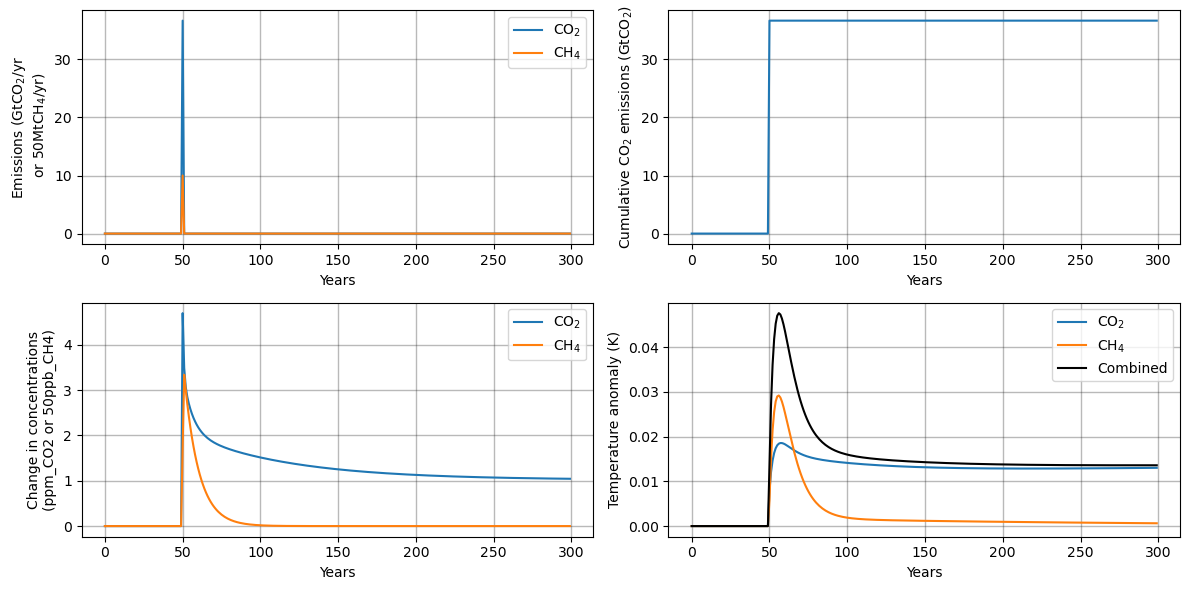

In [29]:
# -- Figure --
fig, axs = plt.subplots(dpi=100, ncols=2, nrows=2, figsize=(12,6))
[ax.grid(True, linewidth=1, color='0.1', alpha=0.3) for ax in axs.flatten()]

# -- Subplot 1: CO2 / CH4 / N2O emissions --
# Plot CO2 emissions:
axs[0,0].plot(years, emiss_C*(44/12), label='CO$_{2}$')
ylabel = "Emissions (GtCO$_{2}$/yr"
if not np.all(emiss_M==0):
    axs[0,0].plot(years, emiss_M/50, label='CH$_{4}$')
    ylabel += "\n or 50MtCH$_{4}$/yr"
if not np.all(emiss_N==0):
    axs[0,0].plot(years, emiss_N/10, label='N$_{2}$O')
    ylabel += "\n or 10MtN$_{2}$O/yr"
ylabel += ")"
# Configure Axes:
axs[0,0].set_ylabel(ylabel)
axs[0,0].set_xlabel("Years")
axs[0,0].legend()

# -- Subplot 2: Cumulative CO2 emissions --
# Plot Cumulative CO2 emissions:
axs[0,1].plot(years, np.cumsum(emiss_C*44/12))
# Configure Axes:
axs[0,1].set_ylabel("Cumulative CO$_{2}$ emissions (GtCO$_{2}$)")
axs[0,1].set_xlabel("Years")

# -- Subplot 3: Change in concentration in atm --
# Plot change in CO2 concentration in atm:
axs[1,0].plot(years, C_co2[:,0]-C_co2[:,0][0], label='CO$_{2}$')
ylabel = "Change in concentrations\n(ppm_CO2"
if not np.all(emiss_M==0):
    axs[1,0].plot(years, C_ch4[:,1]/50 - (C_ch4[:,1]/50)[0], label='CH$_{4}$')
    ylabel += " or 50ppb_CH4"
if not np.all(emiss_N==0):
    axs[1,0].plot(years, C_n2o[:,2]/50 - (C_n2o[:,2]/50)[0], label='N$_{2}$O')
    ylabel += "\n or 50ppb_N2O"
ylabel += ")"
# Configure Axes:
axs[1,0].set_ylabel(ylabel)
axs[1,0].set_xlabel("Years")
axs[1,0].legend()

# -- Subplot 4: Temperature change --
# Plot CO2 temperature change:
if not np.all(emiss_C==0):
    axs[1,1].plot(years, T_co2_def, c='tab:blue',label='CO$_{2}$')
if not np.all(emiss_M==0):
    axs[1,1].plot(years, T_ch4_def, c='tab:orange',label='CH$_{4}$')
if not np.all(emiss_N==0):
    axs[1,1].plot(years, T_n2o_def, c='tab:green',label='N$_{2}$O')
# Plot total temperature change:
axs[1,1].plot(years, T_tot, color='black', label='Combined')
# Configure Axes:
axs[1,1].set_ylabel("Temperature anomaly (K)")
axs[1,1].set_xlabel("Years")
axs[1,1].legend()

fig.tight_layout()

### Scenario 1: Pulse injection of CO2

Make sure the pulse duration is set to 1 year in block A of Section 4 above. Set the peak emissions of CH4 and N2O to zero.

 - <span style="color:blue">Explain the main features of the CO2 concentration and warming curves.</span>
 
 - <span style="color:blue">Approximately what fraction of the emitted CO2 remains in the atmosphere after 10, 100 and 250 years? </span>
 
 - <span style="color:blue">How does this 'airborne fraction' depend on the size of the pulse?</span>
 
 - <span style="color:blue">How do the shapes of the CO2 concentration and warming curves change as the duration of the pulse is increased?</span>

### Scenario 2: Pulse injection of CH4

Set the peak emissions rate of the methane pulse to 500Mt/yr, that of the CO2 pulse to 37GtCO2/yr (the approximate present day anthropogenic emissions rates) and the durations of each to 1 year. 

 - <span style="color:blue">How does the shape of the methane atmospheric concentration time series differ from that for CO2? Why?</span>
 
 - <span style="color:blue">How do the shapes of the temperature response curves for CO2 and methane differ and why?</span>
 
 - <span style="color:blue">What fraction of CH4 remains in the atmosphere after 10, 100, 250 years? How does this depend on the duration and size of the pulse? What about on the *lifetime* of CH4?</span>
 
 - <span style="color:blue">What is the (approximate) relative importance of the effects of CO2 and methane on global mean temperature 10, 25 and 50 years after the emission time?</span>

</br>
</br>

# 5.  Future climate change 

In this section we simulate global mean temperatures under a high-emission future scenario and two (very) idealised emissions mitigation scenarios. 

The high-emission scenario used is the RCP8.5 scenario prepared for the IPCC 5th Assessment Report.

In the mitigation scenarios, the anthropogenic RCP8.5 CO2 emissions, along with radiative forcing (RF) from other greenhouse gases, is multiplied by a factor that decreases from 1 to 0 at a constant rate between two specified years. 

Note that scaling the non-CO2  radiative forcing, rather than non-CO2 emissions, is equivalent to the approximation that gases other than CO2 have zero atmospheric lifetime (or that their emissions started to be reduced earlier).

### **Model Set Up** 

##### A. Simulating the response to different emission scenarios:

In [30]:
def generate_idealized_emissions(year_begin, year_end, baseline_emissions):
    """
    Function to calculate highly-idealized emissions reduction scenarios.
    
    Assumes that anthropogenic RCP8.5 CO2 emissions and non-CO2 radiative forcing (RF) from other gases
    declines linearly from their values at `year_begin` to ZERO at `year_end`.
    """
    idealized_emissions = np.copy(baseline_emissions)
    
    # What reduction per year is required?
    reduction_gradient = idealized_emissions[year_begin-1765, 1:]/(year_end - year_begin)
    
    for idx,year in enumerate(np.arange(year_begin, year_end)):
        
        idealized_emissions[year-1765, 1:] = idealized_emissions[year_begin-1765, 1:]-reduction_gradient*idx 
        
    # After year_end, all emissions=0
    idealized_emissions[year_end-1765:, 1:] = 0.0
    
    return idealized_emissions

##### B. Defining key model parameters:

In [31]:
# Define key model parameters:
ECS   = 2.7     # equilibrium climate sensitivity (K), default=2.7K, IPCC likely range 1.5-4.5 K
TCR   = 1.6     # transient climate response (K), default=1.6K,      IPCC likely range 1.0-2.5 K

tau_s = 4.1     # ocean mixed layer response time scale (years), default=4.1yrs
tau_d = 239.0   # deep ocean response time scale (years), default=239.0yrs

##### C. Defining emission and mitigation pathways:

In [32]:
# Import RCP8.5, a high-emissions scenario from the IPCC:
from fair.RCPs import rcp85

# Baseline RCP85 model run
C85, F85, T85 = fair_scm(
                emissions=rcp85.Emissions.emissions,                  
                tcrecs=np.array([TCR, ECS]),
                d=np.array([tau_d, tau_s])
)

_,_, T85_co2 = fair_scm(
                emissions=rcp85.Emissions.emissions[:,1],                  
                tcrecs=np.array([TCR, ECS]),
                d=np.array([tau_d, tau_s]),
                useMultigas=False      # Only consider CO2

)


# Define idealized mitigation pathways:
# Scenario 1
year_begin_reduce_1 = 2035
year_hit_zero_1     = 2070

idealized_emissions_1 = generate_idealized_emissions(year_begin_reduce_1, year_hit_zero_1, rcp85.Emissions.emissions)

# Scenario 2
year_begin_reduce_2 = 2050
year_hit_zero_2     = 2145

idealized_emissions_2 = generate_idealized_emissions(year_begin_reduce_2, year_hit_zero_2, rcp85.Emissions.emissions)

### **Run Our Model**

In [33]:
# Run the FaIR model for these idealized scenarios:
Cscen1, Fscen1, Tscen1 = fair_scm(
                emissions=idealized_emissions_1,                  
                tcrecs=np.array([TCR, ECS]),
                d=np.array([tau_d, tau_s]))

_,_, Tscen1_co2 = fair_scm(
                emissions=idealized_emissions_1[:,1],                  
                tcrecs=np.array([TCR, ECS]),
                d=np.array([tau_d, tau_s]),
                useMultigas=False) # Only consider CO2

Cscen2, Fscen2, Tscen2 = fair_scm(
                emissions=idealized_emissions_2,                  
                tcrecs=np.array([TCR, ECS]),
                d=np.array([tau_d, tau_s]))

_,_, Tscen2_co2 = fair_scm(
                emissions=idealized_emissions_2[:,1],                  
                tcrecs=np.array([TCR, ECS]),
                d=np.array([tau_d, tau_s]),
                useMultigas=False) # Only consider CO2

# Defining RCP8.5 scenario years for plotting:
years = rcp85.Emissions.year

### **Explore Our Model Output**

With ECS = 2.7 K -> RCP8.5 dT/dCumEm = 1.46 K/1000 GtC


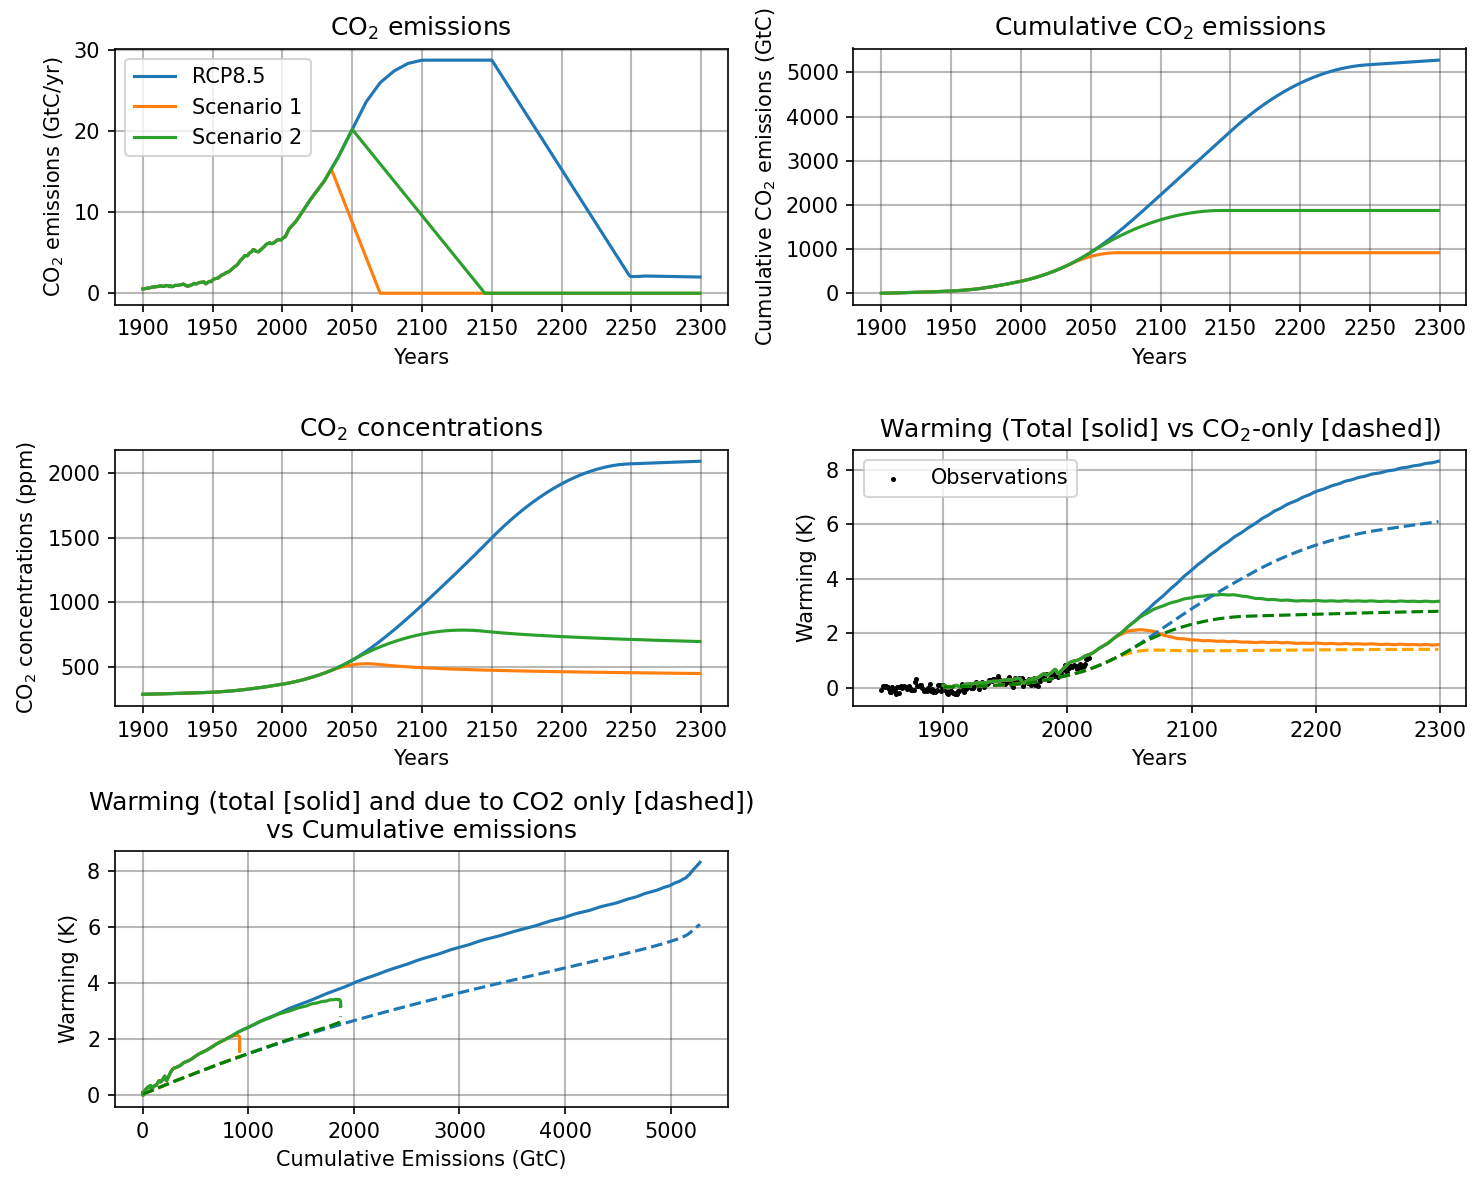

In [34]:
# -- Figure --
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8), dpi=150)
[ax.grid(True, linewidth=1, color='0.1', alpha=0.3) for ax in axs.flatten()]

# -- Subplot 1: CO2 emissions --
axs[0,0].plot(years[1900-1765:2300-1765], rcp85.Emissions.emissions[:,1][1900-1765:2300-1765], label='RCP8.5')
axs[0,0].plot(years[1900-1765:2300-1765], idealized_emissions_1[:,1][1900-1765:2300-1765], label='Scenario 1')
axs[0,0].plot(years[1900-1765:2300-1765], idealized_emissions_2[:,1][1900-1765:2300-1765], label='Scenario 2')
axs[0,0].set_ylabel("CO$_{2}$ emissions (GtC/yr)")
axs[0,0].legend(loc='upper left')
axs[0,0].set_xlabel('Years')
axs[0,0].set_title("CO$_{2}$ emissions")

# -- Subplot 2: Cumulative CO2 emissions --
axs[0,1].plot(years[1900-1765:2300-1765], np.cumsum(rcp85.Emissions.emissions[:,1][1900-1765:2300-1765]))
axs[0,1].plot(years[1900-1765:2300-1765], np.cumsum(idealized_emissions_1[:,1][1900-1765:2300-1765]))
axs[0,1].plot(years[1900-1765:2300-1765], np.cumsum(idealized_emissions_2[:,1][1900-1765:2300-1765]))
axs[0,1].set_ylabel("Cumulative CO$_{2}$ emissions (GtC)")
axs[0,1].set_xlabel('Years')
axs[0,1].set_title("Cumulative CO$_{2}$ emissions")

# -- Subplot 3: CO2 concentrations --
axs[1,0].plot(years[1900-1765:2300-1765], C85[:,0][1900-1765:2300-1765])
axs[1,0].plot(years[1900-1765:2300-1765], Cscen1[:,0][1900-1765:2300-1765])
axs[1,0].plot(years[1900-1765:2300-1765], Cscen2[:,0][1900-1765:2300-1765])
axs[1,0].set_ylabel("CO$_{2}$ concentrations (ppm)")
axs[1,0].set_xlabel('Years')
axs[1,0].set_title("CO$_{2}$ concentrations")

# -- Subplot 4: Temperature change --
axs[1,1].scatter(Y_obs, T_obs, s=2, color='black', label='Observations')
axs[1,1].plot(years[1900-1765:2300-1765], T85[1900-1765:2300-1765])
axs[1,1].plot(years[1900-1765:2300-1765], Tscen1[1900-1765:2300-1765])
axs[1,1].plot(years[1900-1765:2300-1765], Tscen2[1900-1765:2300-1765])

axs[1,1].plot(years[1900-1765:2300-1765], T85_co2[1900-1765:2300-1765], color='tab:blue', linestyle='dashed')
axs[1,1].plot(years[1900-1765:2300-1765], Tscen1_co2[1900-1765:2300-1765], color='orange', linestyle='dashed')
axs[1,1].plot(years[1900-1765:2300-1765], Tscen2_co2[1900-1765:2300-1765], color='green', linestyle='dashed')

axs[1,1].set_ylabel("Warming (K)")
axs[1,1].set_xlabel('Years')
axs[1,1].set_title("Warming (Total [solid] vs CO$_{2}$-only [dashed])")
axs[1,1].legend()

# -- Subplot 5: Warming vs cumulative emissions --
axs[2,0].plot(np.cumsum(rcp85.Emissions.emissions[:,1][1900-1765:2300-1765]), T85[1900-1765:2300-1765])
axs[2,0].plot(np.cumsum(idealized_emissions_1[:,1][1900-1765:2300-1765]), Tscen1[1900-1765:2300-1765])
axs[2,0].plot(np.cumsum(idealized_emissions_2[:,1][1900-1765:2300-1765]), Tscen2[1900-1765:2300-1765])

axs[2,0].plot(np.cumsum(rcp85.Emissions.emissions[:,1][1900-1765:2300-1765]), T85_co2[1900-1765:2300-1765], color='tab:blue', linestyle='dashed')
axs[2,0].plot(np.cumsum(idealized_emissions_1[:,1][1900-1765:2300-1765]), Tscen1_co2[1900-1765:2300-1765], color='orange', linestyle='dashed')
axs[2,0].plot(np.cumsum(idealized_emissions_2[:,1][1900-1765:2300-1765]), Tscen2_co2[1900-1765:2300-1765], color='green', linestyle='dashed')

axs[2,0].set_title("Warming (total [solid] and due to CO2 only [dashed])\nvs Cumulative emissions")
axs[2,0].set_xlabel("Cumulative Emissions (GtC)")
axs[2,0].set_ylabel("Warming (K)")
axs[2,1].set_axis_off()

fig.tight_layout()

# Statistics of model outputs:
print(f"With ECS = {ECS} K -> RCP8.5 dT/dCumEm = {round(1000*np.polyfit(np.cumsum(rcp85.Emissions.emissions[:,1][1900-1765:2300-1765]), T85[1900-1765:2300-1765], 1)[0], 2)} K/1000 GtC")


</br>

### The impact of mitigation strategies

- <span style="color:blue">For each of the given future scenarios, can you explain the shapes of the different curves shown?</span>
    
- <span style="color:blue">  For the default model parameters, how well do cumulative carbon emissions alone explain the projected total warming for each scenario? </span>
    
- <span style="color:blue">     What do you think is the reason for any differences in warming once the same cumulative emissions level has been reached?</span>

Hint – consider the dashed curves, which show the warming due to CO2 only....


Now increase the equilibrium climate sensitivity (ECS) to 5K (the top of the likely range given by the IPCC 6th assessment report) in block B under Section 5. 

 - <span style="color:blue">How does this change the relationship between cumulative CO2 emissions and temperature, and why? What are the implications for predicting long-term climate change?</span>